In [1]:
% matplotlib inline

import logging
import sys
from neural_metrics.analyze import plot_layer_combinations_gradient

logging.basicConfig(stream=sys.stdout, level=logging.getLevelName("INFO"))


Using TensorFlow backend.


## Combinatorical

In [12]:
import math

def nchooser(n, r):
    f = math.factorial
    return int(f(n) / f(r) / f(n - r))


def hours_per_combination(num_combinations, secs=10):
    seconds_per_combination = num_combinations * secs
    return seconds_per_combination / 60 / 60

def log(text, num_combinations):
    print("{}: {} ({:.2f} hours)".format(text, num_combinations, hours_per_combination(num_combinations)))

for num_layers in [10, 50, 150]:
    print("# {} layers".format(num_layers))
    log("pairwise combinations", nchooser(num_layers, 2))
    log("arbitrary combinations", sum(nchooser(num_layers, r) for r in range(1, num_layers + 1)))
    log("connected combinations", sum(r for r in range(1, num_layers + 1)))
    log("connected combinations given middle layer",
        2 * sum(r for r in range(1, int(math.ceil(num_layers / 2) + 1))) - (
            math.ceil(num_layers / 2) if num_layers % 2 != 0 else 0))
    print()


# 10 layers
pairwise combinations: 45 (0.12 hours)
arbitrary combinations: 1023 (2.84 hours)
connected combinations: 55 (0.15 hours)
connected combinations given middle layer: 30 (0.08 hours)

# 50 layers
pairwise combinations: 1225 (3.40 hours)
arbitrary combinations: 1125899906842619 (3127499741229.50 hours)
connected combinations: 1275 (3.54 hours)
connected combinations given middle layer: 650 (1.81 hours)

# 150 layers
pairwise combinations: 11175 (31.04 hours)
arbitrary combinations: 1427247692705959880108344117624461087675923603 (3964576924183221424162335073993827083616256.00 hours)
connected combinations: 11325 (31.46 hours)
connected combinations given middle layer: 5700 (15.83 hours)



## Empirical

### VGG16

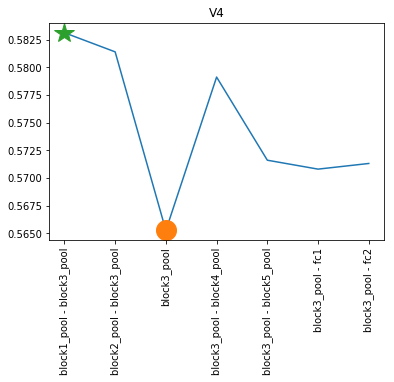

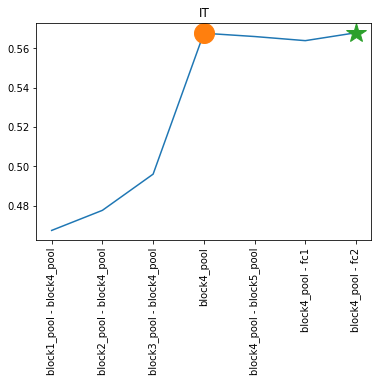

In [2]:
plot_layer_combinations_gradient(model='vgg16')

### ResNet50

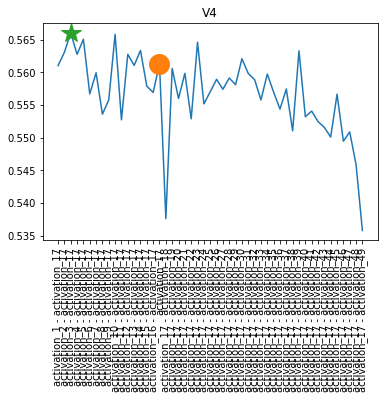

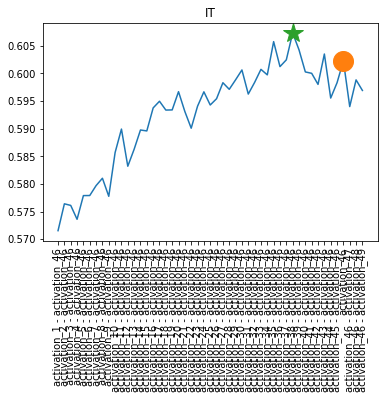

In [3]:
plot_layer_combinations_gradient(model='resnet50')